In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [8]:
from sklearn.datasets import fetch_california_housing
# Fetching California housing dataset
cali = fetch_california_housing()

In [9]:
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
df=pd.DataFrame(cali['data'],columns=cali['feature_names'])
df.head(n=15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [11]:
Y = pd.Series(cali['target'],name='Target')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df, Y, test_size=0.25, random_state=45)

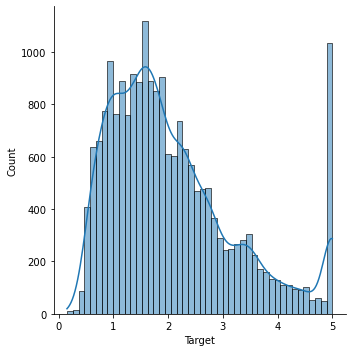

In [13]:
sns.displot(Y,kde=True)

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [15]:
df.isnull().values.any()

False

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lRegression_model=LinearRegression()
lRegression_model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_train

14961    2.494
11810    1.640
14150    1.542
1236     1.235
278      1.728
         ...  
16547    1.215
16317    0.875
12895    1.832
6012     1.135
6558     3.594
Name: Target, Length: 15480, dtype: float64

In [17]:
y_pred=lRegression_model.predict(X_test)

In [18]:
y_pred[:7]

array([1.39731629, 1.70049374, 2.32733562, 0.9929158 , 2.31484103,
       0.98303303, 2.28338014])

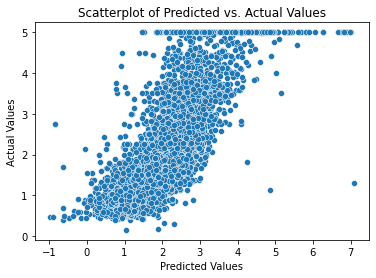

In [20]:
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Scatterplot of Predicted vs. Actual Values")
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.5249
Accuracy of the model: 0.4751


In [39]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.6045
Root Mean Squared Error: 0.7245


#### As we can see, the error we get from this model is too high, hence the model does not predict properly. Therefore, exploring different model is neccessary for better prediction.

### Predictions

In [21]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3046,2.4044,34.0,5.478632,1.079772,1101.0,3.136752,35.50,-119.28
6803,2.5750,40.0,4.329596,1.006726,1367.0,3.065022,34.08,-118.13
10112,4.5096,30.0,5.165049,0.993528,845.0,2.734628,33.94,-117.94
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79
5008,3.7727,47.0,4.536082,0.890034,653.0,2.243986,34.01,-118.33


In [43]:
x_trial=np.array([4.0, 40.0, 5.3, 1.0, 1200.0, 3.0, 33, -110])

In [44]:
x_trial.reshape(1,-1)

array([[ 4.0e+00,  4.0e+01,  5.3e+00,  1.0e+00,  1.2e+03,  3.0e+00,
         3.3e+01, -1.1e+02]])

In [45]:
x_trial_predict= lRegression_model.predict(x_trial.reshape(1,-1))

In [46]:
print(x_trial_predict)

[-0.92234944]


## Random Forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=45), param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train a model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=45, **best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = best_rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best Random Forest Regressor Results:")
print(f"Best Parameters: {best_params}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Best Random Forest Regressor Results:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Root Mean Squared Error (RMSE): 0.4954
R-squared: 0.8150


### Test the predictions from the Random Forest Method

In [49]:
x_trial_rf=np.array([4.0, 40.0, 5.3, 1.0, 1200.0, 3.0, 33, -110])
x_trial_rf.reshape(1,-1)

array([[ 4.0e+00,  4.0e+01,  5.3e+00,  1.0e+00,  1.2e+03,  3.0e+00,
         3.3e+01, -1.1e+02]])

In [50]:
x_trial_rf_predict= best_rf_model.predict(x_trial.reshape(1,-1))
print(x_trial_rf_predict)

[1.12312]


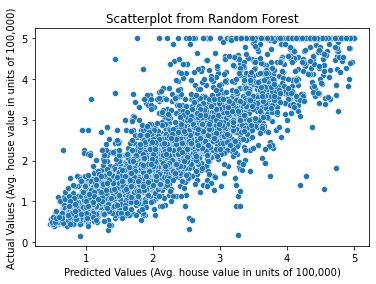

In [54]:
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Values (Avg. house value in units of 100,000)")
plt.ylabel("Actual Values (Avg. house value in units of 100,000)")
plt.title("Scatterplot from Random Forest")
plt.show()

#### We can see that this plot is linear in nature and hence,this model has the minimal error. We can even compare the RMSE values from the two models implemented. 